# RSAM notebook

In this tutorial, we will explore Real-time Seismic Amplitude Measurement (RSAM) data. 

RSAM is, by definition, computed on raw seismic data, so we can also think of it as "Raw" Seismic Amplitude Measurement, to distinguish from similar measurements we will make later on velocity and displacement seismograms.

## 1. Original RSAM system

The RSAM system was built around a 8-bit analog-to-digital-converter PC card: software was too slow in those days. Components of the original RSAM system were:

<font color='blue'>
<ol>
<li>Real-time bar graphs: showing average seismic amplitudes over last 2.56 s, 1 minute, and 10 minutes</li>
<li><b>1 minute and 10 minute mean signal amplitudes, logged to binary files. This is what most volcano-seismologists today think of as "RSAM data"!</b></li>
<li>"RSAM events": created by a simple STA/LTA detector running on each channel (NSLC)</li>
<li>Multi-station event (e.g. earthquake) and tremor alarm systems</li>
<li>Trends in RSAM data and other datasets (e.g. earthquake counts, tiltmeter data, gas flux, deformation, etc.) could be visualized with another software package called "BOB"</li>
</ol></font>

<table border=1><tr><td><img width=100% src="images/rsam.png" ></td><td>RSAM barcharts from Glowworm running in Montserrat in 2002. Tom Murray wrote the original RSAM system in 1985 and the GlowWorm system c. 1998 to provide volcano-monitoring extensions to Earthworm.</td></table></tr></table>

<table border=1><tr><td><img width=100% src="images/EndoMurray1991fig7.png" ></td><td>BOB plot. Fig 7 from Endo & Murray (1991). Top panel shows RSAM event rate at closest station to Pinatubo. Bottom 3 panels show RSAM data from stations at increasing distances. 30 days of data are show</td></table></tr></table>

In the figure above, 30 days of RSAM data are shown for three seismic stations. Loading and plotting 30 days of raw seismic data takes a while, but 1-minute RSAM data downsamples the raw seismic data by a factor of 6,000 (assuming a 100 Hz sampling rate), so long RSAM timeseries (hours, days, weeks, months, etc.) can be quickly loaded and plotted.

Reference:
- Endo, E.T., Murray, T. Real-time Seismic Amplitude Measurement (RSAM): a volcano monitoring and prediction tool. Bull Volcanol 53, 533–545 (1991).__[https://doi.org/10.1007/BF00298154](../../pdf/RSAM_EndoMurray1991.pdf)__

## 2. Computing RSAM data

### 2.1 Simple example

Here is a minimal example of computing RSAM data from an ObsPy Stream object. The data come from station REF at Redoubt Volcano in Alaska on 2009/03/22.

/Users/thompsong/Developer/skience2024/02 Volcano Monitoring/data/continuous/SDS/2003/MV/MBWH/SHZ.D/MV.MBWH..SHZ.D.2003.193


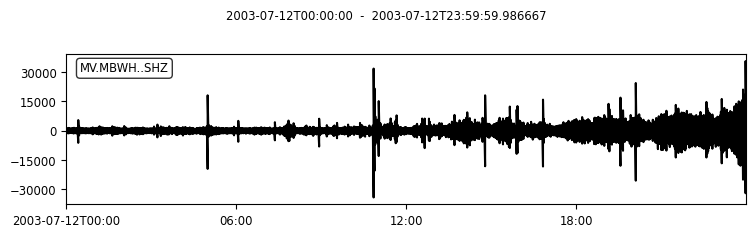

METRIC:  mean


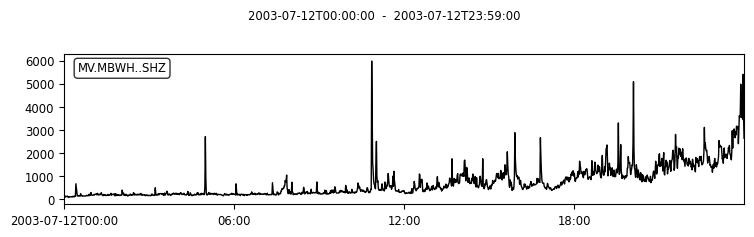

In [2]:
import sys
from pathlib import Path
import obspy
localLibPath = Path.cwd().resolve().joinpath('lib')
sys.path.append(str(localLibPath))
from SAM import RSAM
SDS_DIR = Path.cwd().joinpath('data','continuous','SDS')
SAM_DIR = Path.cwd().joinpath('data','continuous','SAM')

# Load data for station AV.REF for year 2009 day 81
#mseedfile = str(SDS_DIR.joinpath('2009','AV','REF','EHZ.D', 'AV.REF..EHZ.D.2009.081' ))
mseedfile = str(SDS_DIR.joinpath('2003','MV','MBWH','SHZ.D', 'MV.MBWH..SHZ.D.2003.193' ))
print(mseedfile)
st = obspy.read(mseedfile)

# plot the raw Stream object
st.plot();

# compute and plot 1-minute RSAM
rsamObj = RSAM(stream=st, sampling_interval=60) # 60-s sampling interval
rsamObj.plot()

Let's see what helpful information we can get about the RSAM class:

In [12]:
help(RSAM)

Help on class RSAM in module SAM:

class RSAM(SAM)
 |  RSAM(dataframes=None, stream=None, sampling_interval=60.0, filter=[0.5, 18.0], bands={'VLP': [0.02, 0.2], 'LP': [0.5, 4.0], 'VT': [4.0, 18.0]}, corners=4, clip=None, verbose=False)
 |  
 |  Method resolution order:
 |      RSAM
 |      SAM
 |      builtins.object
 |  
 |  Class methods defined here:
 |  
 |  readRSAMbinary(SAM_DIR, station, stime, etime) from builtins.type
 |      read one (or many if station is a list) RSAM binary file(s) recorded by the original RSAM system
 |      return corresponding RSAM object
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  check_units(st)
 |  
 |  get_filename(SAM_DIR, id, year, sampling_interval, ext, name='RSAM')
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from SAM:
 |  
 |  __init__(self, dataframes=None, stream=None, sampling_interval=60.0, filter=[0.5, 18.0

An RSAM object can be created by passing an ObsPy Stream object as an input parameter, and setting a sampling_interval (default: 60s). 

By default, the Stream object will be bandpass filtered from 0.5-18.0 Hz (the `filter` parameter) before computing RSAM. However, some other filters are defined for the VLP (0.02-0.2 Hz), LP (0.5-4.0 Hz), and VT (4.0-18.0 Hz) bands using `bands`, which is a Python dictionary. The frequency ratio is computed from the VT and LP bands, so override these definitions if they should be set differently for your dataset.

Internally, RSAM data for each ObsPy Trace object in the Stream is held in a pandas DataFrame.

In the present example, the Stream only contains 1 Trace and we can view the dataframe with:

In [13]:
print(rsamObj.dataframes['MV.MBWH..SHZ'])

              time       min         mean           max       median  \
0     1.057968e+09  0.008363   152.802948    968.092058    99.179752   
1     1.057968e+09  0.055709   166.520431   1062.701184   111.715163   
2     1.057968e+09  0.016109   154.956205   1026.996283   100.333016   
3     1.057968e+09  0.122497   101.614868    791.730822    68.160744   
4     1.057968e+09  0.019604   119.956491   1030.793928    70.889618   
...            ...       ...          ...           ...          ...   
1435  1.058054e+09  0.012059  4680.516455  20467.834592  3883.000779   
1436  1.058054e+09  2.093220  3468.700706  14036.625459  2956.473509   
1437  1.058054e+09  1.032083  5403.786342  28571.608325  4342.451666   
1438  1.058054e+09  0.407074  3527.865467  16511.685747  2821.588345   
1439  1.058054e+09  1.072345  2642.843734  12017.577089  2193.032853   

              rms       VLP           LP           VT    fratio  
0      155.368784  4.424670   136.956112    60.735501 -1.173102  
1  

The 'time' column is in Unix epoch seconds (since 1970-01-01 00:00:00) (<em>I'll probably change this to Python datetime...</em>)

The original RSAM system calculated the mean signal amplitude at sample intervals of 2.56s, 60s, and 600s, as shown in the bar graph above. However, it is cheap and fast today to compute and store other metrics for each sample interval too, so RSAM objects also contain the min, max, median, and rms amplitude of each sample interval. (The aforementioned VLP, LP, and VT bands are computed just with the mean). A full list of the available metrics can be gotten like this:

In [10]:
print(rsamObj.get_metrics())

Index(['min', 'mean', 'max', 'median', 'rms', 'VLP', 'LP', 'VT', 'fratio'], dtype='object')


Specific metrics can be plotted:

METRIC:  mean


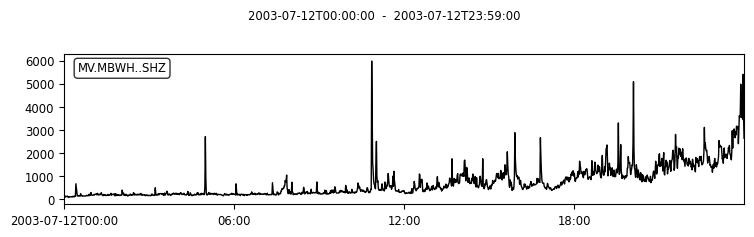

METRIC:  median


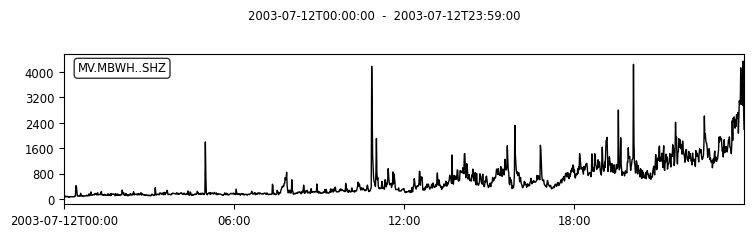

METRIC:  rms


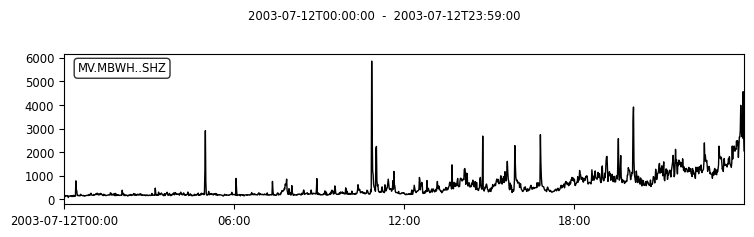

METRIC:  max


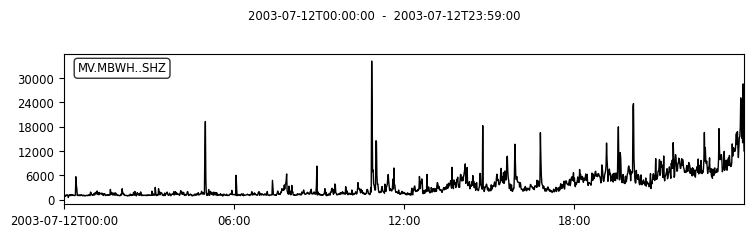

In [14]:
rsamObj60s.plot(metrics=['mean','median','rms','max'])

For tremor analysis, I prefer to use the median, because it isn't biased by outliers the way the mean, rms, and max are. On the other hand, if my focus is to see the size of the largest events, it might be best to plot the max.

The way we have plotted the RSAM object so far calls the to_stream() method, so each RSAM DataFrame is converted into an ObsPy Trace before plotting. However, we can also plot the DataFrame directly with kind='line':

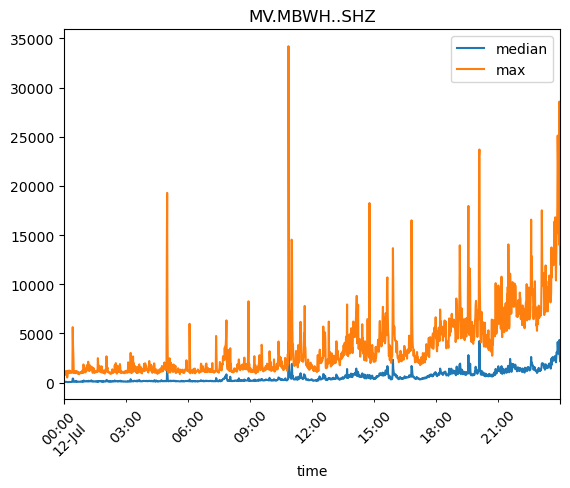

In [19]:
rsamObj.plot(metrics=['median', 'max'], kind='line') 
# shorthand for metrics=['VLP', 'LP', 'VT', 'fratio']

Finally, we can plot the frequency band information:

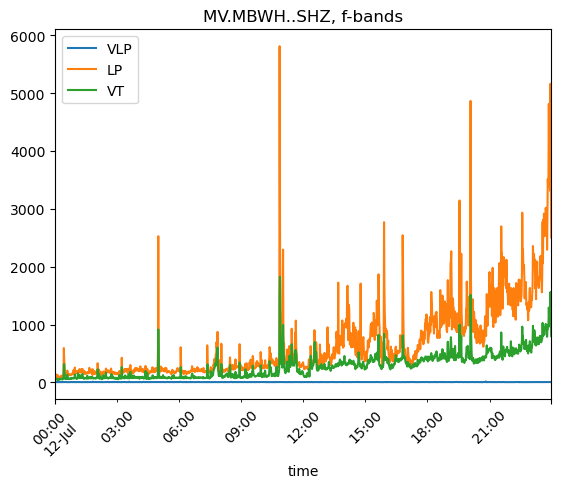

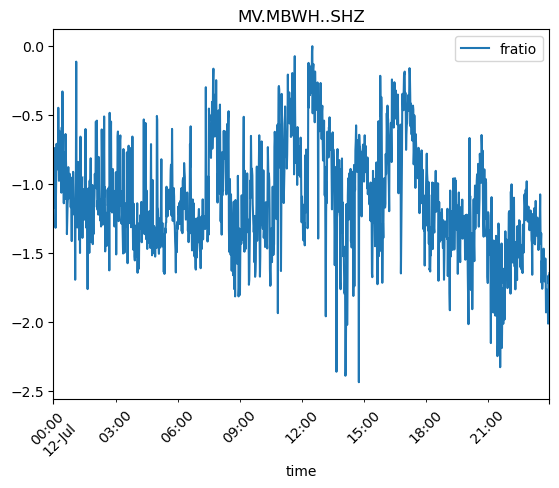

In [21]:
rsamObj.plot(metrics='bands', kind='line') 
rsamObj.plot(metrics='fratio', kind='line') 

## 2.2 Non-trivial example



In [22]:
from obspy.clients.filesystem.sds import Client as sdsclient

# Compute RSAM in 1-day chunks for multiple network-station-location-channel's
mySDSclient = sdsclient(str(SDS_DIR))
startTime = obspy.core.UTCDateTime(2003,7,9)
endTime = obspy.core.UTCDateTime(2003,7,16)
secondsPerDay = 60 * 60 * 24
numDays = (endTime-startTime)/secondsPerDay
daytime = startTime
while daytime < endTime:
    print(f'Loading Stream data for {daytime}')
    st = mySDSclient.get_waveforms("MV", "*", "*", "[SBEHCD]*", daytime, daytime+secondsPerDay)
    print(f'- got {len(st)} Trace ids')
    print(f'Computing RSAM metrics for {daytime}, and saving to pickle files')
    rsamMV24h = RSAM(stream=st, sampling_interval=60)
    rsamMV24h.write(str(SAM_DIR), ext='csv', overwrite=True)
    daytime += secondsPerDay
del mySDSclient

Loading Stream data for 2003-07-09T00:00:00.000000Z
- got 8 Trace ids
Computing RSAM metrics for 2003-07-09T00:00:00.000000Z, and saving to pickle files
write
/Users/thompsong/Developer/skience2024/02 Volcano Monitoring/data/continuous/SAM/RSAM_MV.MBGB..BHZ_2003_60s.csv
Modifying /Users/thompsong/Developer/skience2024/02 Volcano Monitoring/data/continuous/SAM/RSAM_MV.MBGB..BHZ_2003_60s.csv
/Users/thompsong/Developer/skience2024/02 Volcano Monitoring/data/continuous/SAM/RSAM_MV.MBGH..BHZ_2003_60s.csv
Modifying /Users/thompsong/Developer/skience2024/02 Volcano Monitoring/data/continuous/SAM/RSAM_MV.MBGH..BHZ_2003_60s.csv
/Users/thompsong/Developer/skience2024/02 Volcano Monitoring/data/continuous/SAM/RSAM_MV.MBLG..SHZ_2003_60s.csv
Modifying /Users/thompsong/Developer/skience2024/02 Volcano Monitoring/data/continuous/SAM/RSAM_MV.MBLG..SHZ_2003_60s.csv
/Users/thompsong/Developer/skience2024/02 Volcano Monitoring/data/continuous/SAM/RSAM_MV.MBLY..BHZ_2003_60s.csv
Modifying /Users/thompsong/

METRIC:  median


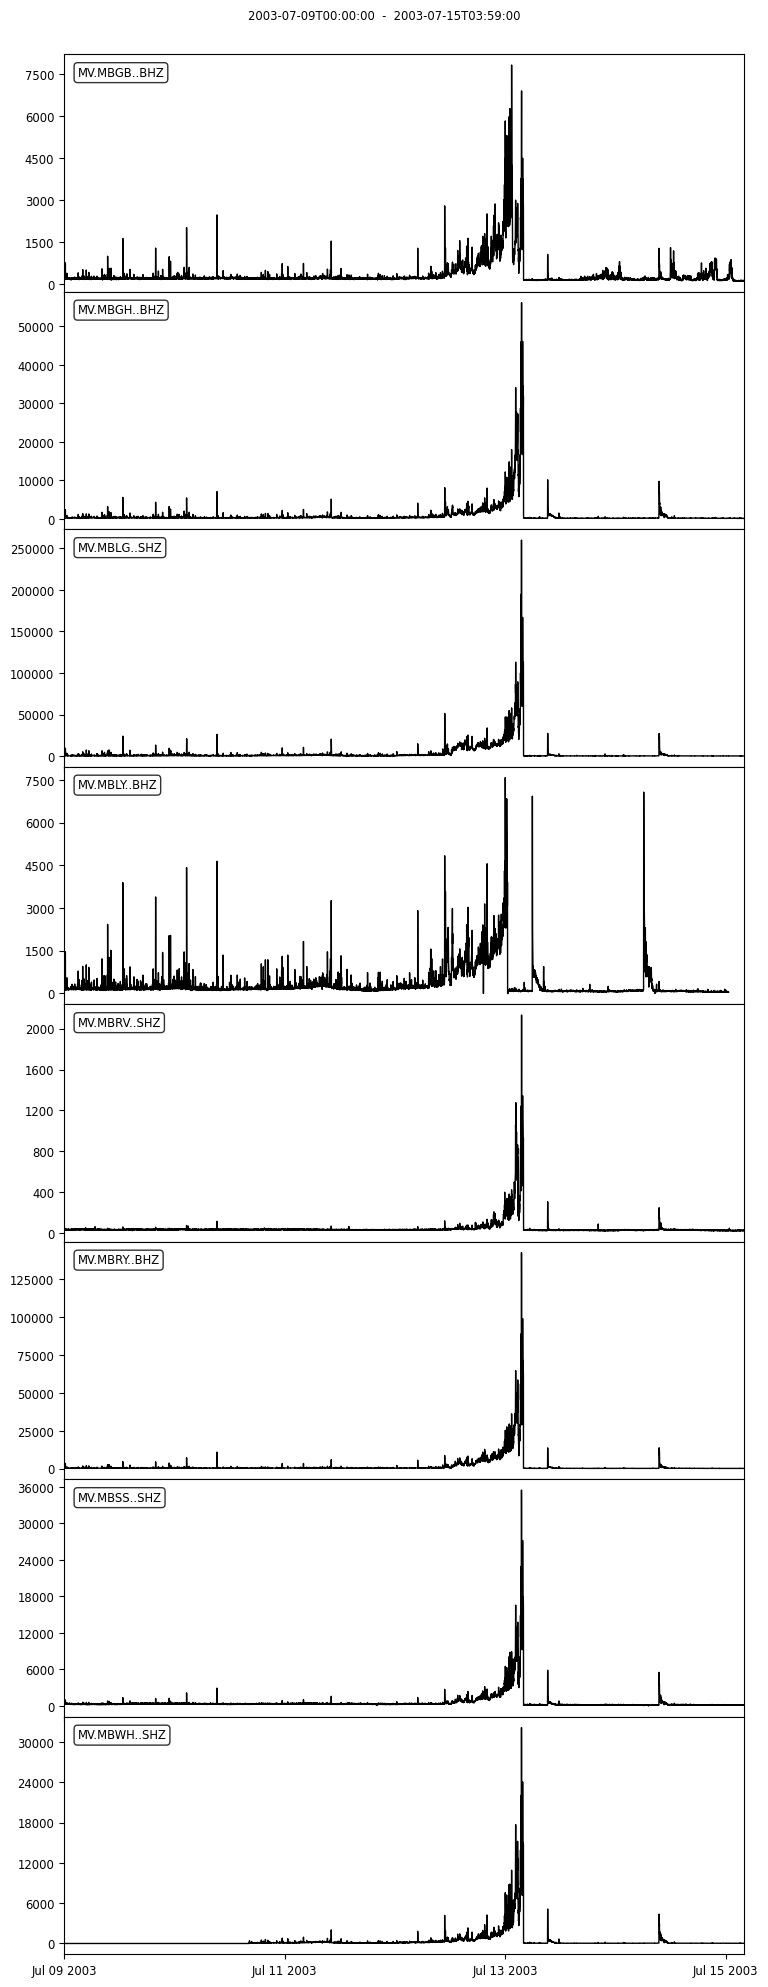

In [23]:
# Read all the RSAM data back, and plot
rsamObj = RSAM.read(startTime, endTime, SAM_DIR=str(SAM_DIR), ext='csv')
rsamObj = rsamObj.select(component='Z')
rsamObj.plot(metrics='median')

In [25]:
startTime = obspy.core.UTCDateTime(2003,7,13)
endTime = obspy.core.UTCDateTime(2003,7,14)
rsamObj2 = rsamObj.copy().trim(starttime=startTime, endtime=endTime)
rsamObj2.plot(metrics='median')

AttributeError: 'NoneType' object has no attribute 'plot'

METRIC:  fratio


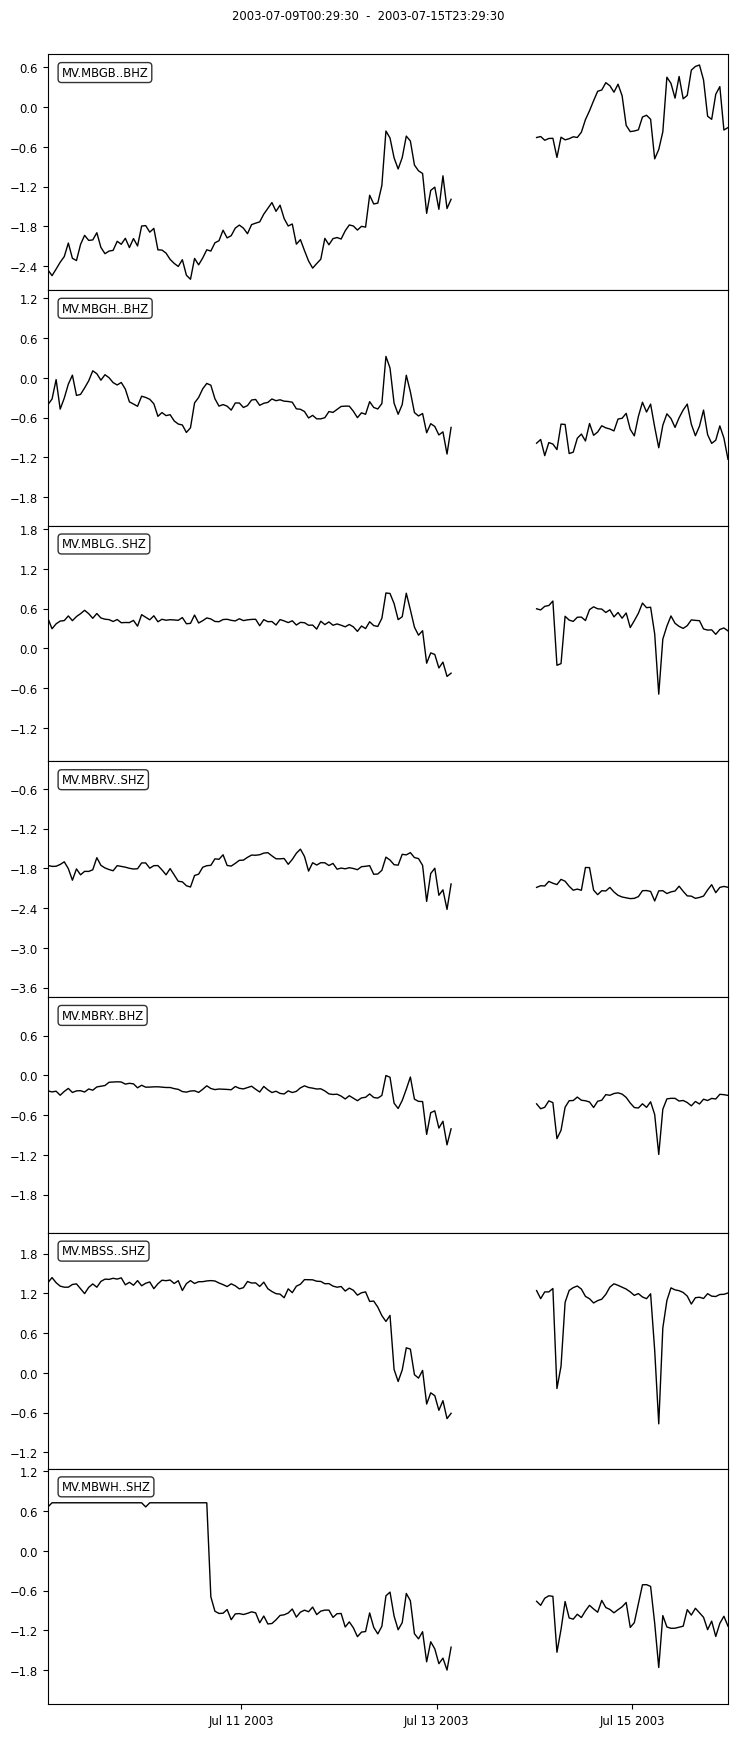

In [26]:
rsamObjHourly  = rsamObj.downsample(new_sampling_interval=3600)
rsamObjHourly.drop('MV.MBLY..BHZ')
rsamObjHourly.plot(metrics='fratio', equal_scale='True')

Notice there is a significant data gap on July 13th. 

## 3. RSAM data processing

We can process the data in various ways. Some of these (e.g. using `select()`, `trim()`), should be familiar from ObsPy `Stream` objects. Others such as `downsample()` are not.

## 3. Legacy RSAM data 

### 3.1 Loading legacy RSAM data from binary files

The RSAM system was used at many observatories, and so many observatories likely have archives of RSAM binary files. But we can read these, making them Interoperable and Reusable. (Tiltmeter was saved in the same format, and so can also be read).

Next we will load 1 year of RSAM data for 8 stations recorded by the original RSAM system that was deployed in Montserrat. These data only have a 'mean' metric - it is just how they were recorded at the time.


Reading  /Users/thompsong/Developer/skience2024/02 Volcano Monitoring/data/continuous/SAM/binary/MGHZ1997.DAT
Reading  /Users/thompsong/Developer/skience2024/02 Volcano Monitoring/data/continuous/SAM/binary/MGAT1997.DAT
Reading  /Users/thompsong/Developer/skience2024/02 Volcano Monitoring/data/continuous/SAM/binary/MLGT1997.DAT
Reading  /Users/thompsong/Developer/skience2024/02 Volcano Monitoring/data/continuous/SAM/binary/MRYT1997.DAT
METRIC:  mean


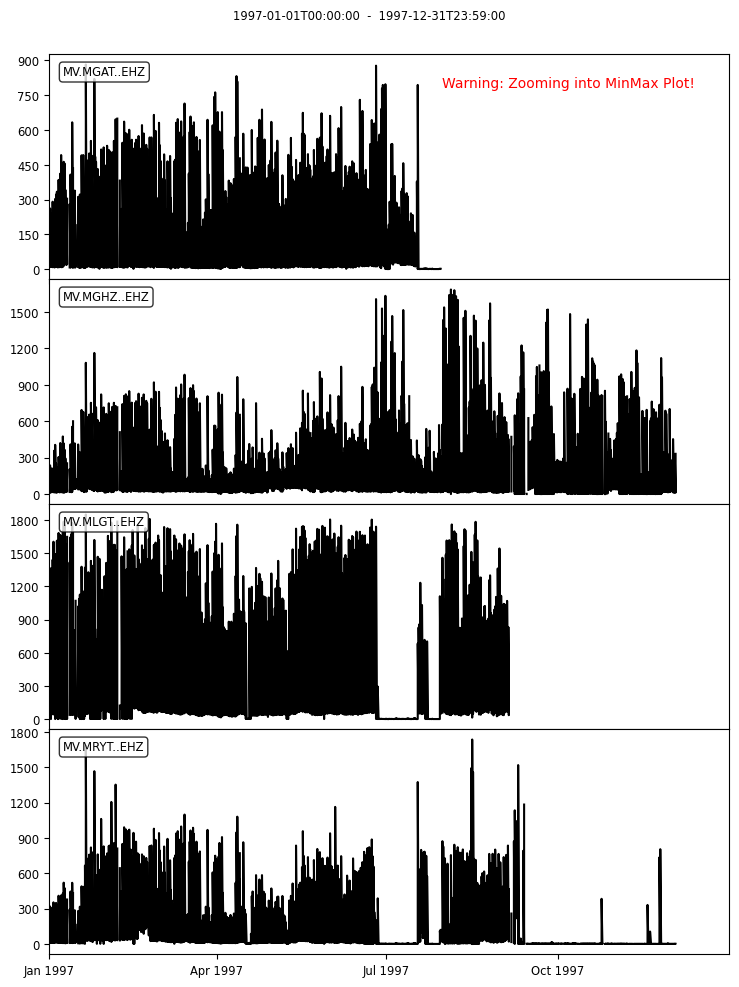

In [3]:
stime = obspy.core.UTCDateTime(1997,1,1,0,0,0)
etime = obspy.core.UTCDateTime(1997,12,31,23,59,59)
BINARY_DIR = SAM_DIR.joinpath('binary')
files = list(BINARY_DIR.glob(f'M???{stime.year}.DAT'))
stations = [path.name[0:4] for path in files]
rsamObj = RSAM.readRSAMbinary(str(BINARY_DIR), stations, stime, etime)
#print(rsamObj)
rsamObj.plot()

### 3.2 Converting legacy RSAM binary files to modern RSAM CSV/Pickle files
Since we have already read the binary files into a (single) RSAM object, writing them to modern RSAM data format is as simple as:

In [4]:
rsamObj.write(str(SAM_DIR), ext='csv')

write
/Users/thompsong/Developer/skience2024/02 Volcano Monitoring/data/continuous/SAM/RSAM_MV.MGHZ..EHZ_1997_60s.csv
Writing /Users/thompsong/Developer/skience2024/02 Volcano Monitoring/data/continuous/SAM/RSAM_MV.MGHZ..EHZ_1997_60s.csv
/Users/thompsong/Developer/skience2024/02 Volcano Monitoring/data/continuous/SAM/RSAM_MV.MGAT..EHZ_1997_60s.csv
Writing /Users/thompsong/Developer/skience2024/02 Volcano Monitoring/data/continuous/SAM/RSAM_MV.MGAT..EHZ_1997_60s.csv
/Users/thompsong/Developer/skience2024/02 Volcano Monitoring/data/continuous/SAM/RSAM_MV.MLGT..EHZ_1997_60s.csv
Writing /Users/thompsong/Developer/skience2024/02 Volcano Monitoring/data/continuous/SAM/RSAM_MV.MLGT..EHZ_1997_60s.csv
/Users/thompsong/Developer/skience2024/02 Volcano Monitoring/data/continuous/SAM/RSAM_MV.MRYT..EHZ_1997_60s.csv
Writing /Users/thompsong/Developer/skience2024/02 Volcano Monitoring/data/continuous/SAM/RSAM_MV.MRYT..EHZ_1997_60s.csv


## 4. RSAM data processing and analysis

### 4.1 read and plot

Next we will:
- (re-)read (from disk) the RSAM data from 1996-02-15 to 1996-10-12 for select SEED ids
- plot the data. By default, the plot() method will convert RSAM dataframes into an ObsPy Stream object, so it can be plotted in a familiar way.

METRIC:  mean


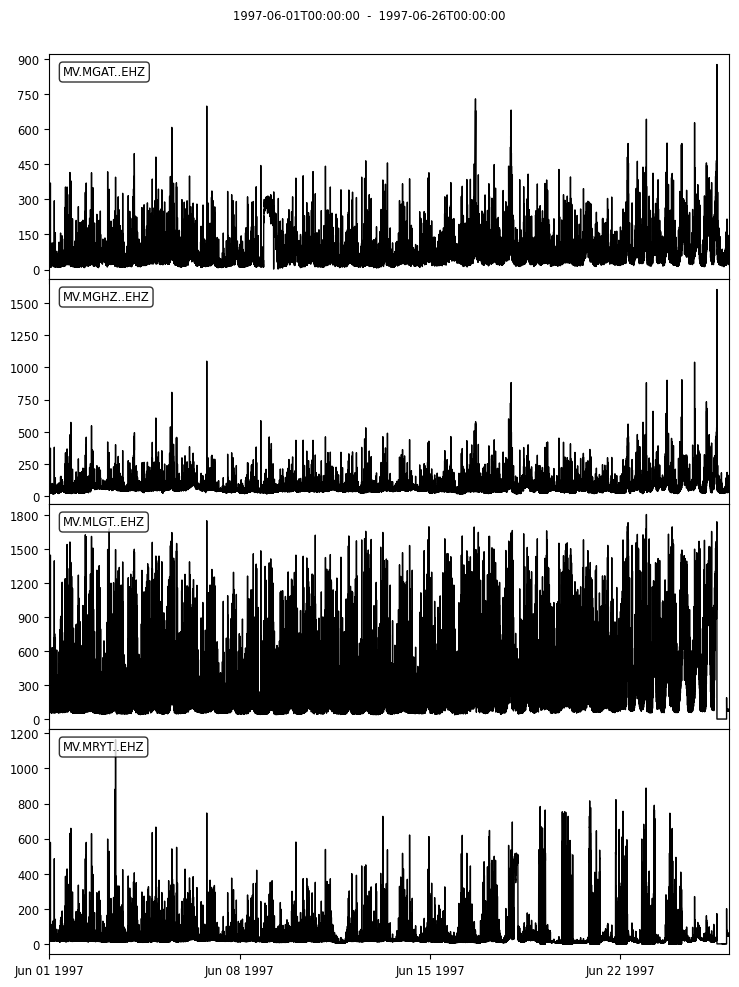

In [17]:
startt = obspy.core.UTCDateTime(1997,6,1)
endt = obspy.core.UTCDateTime(1997,6,26)
rsamObj = RSAM.read(startt, endt, SAM_DIR=str(SAM_DIR), ext='csv')
rsamObj.plot()   

We see that the lower two station, MRYT and MLGT, cut out on Jun 25 1997. This was a tragic day in Montserrat history because a series of pyroclastic flows destroyed several villages and killed 19 people who were within the exlcusion zone against the frequently repeated advice from MVO.

### 4.2 Downsample 

METRIC:  mean


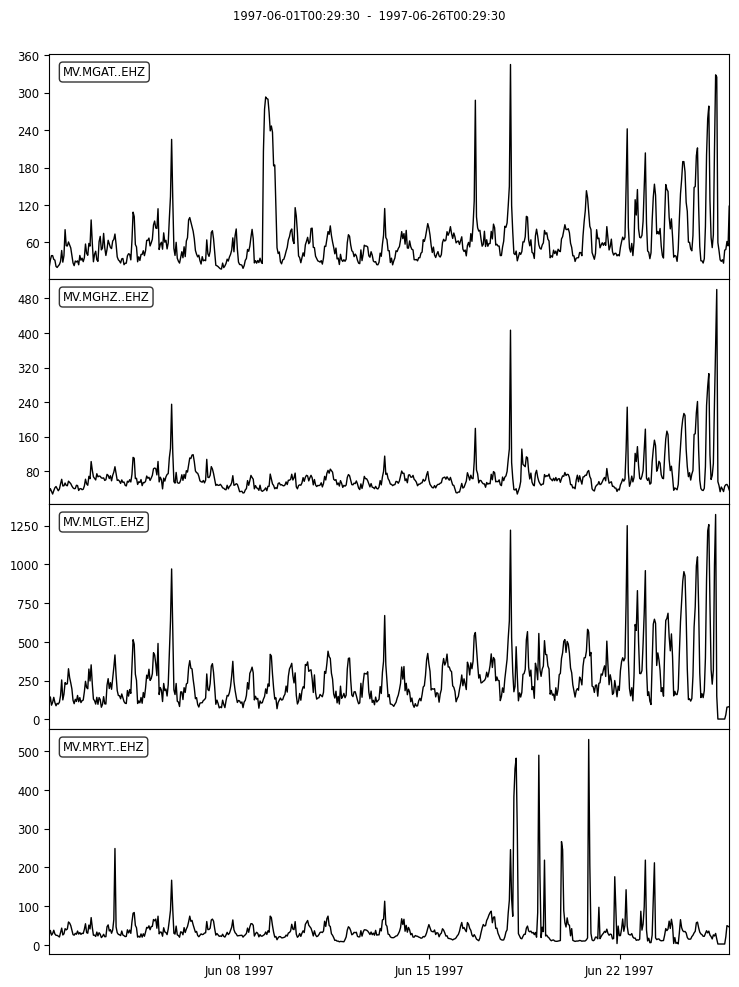

In [18]:
# downsample
rsamObjHourly = rsamObj.downsample(new_sampling_interval=3600) 

# plot
rsamObjHourly.plot()

We see prominent cycles in RSAM. Let us look at early August period in more detail:

METRIC:  mean


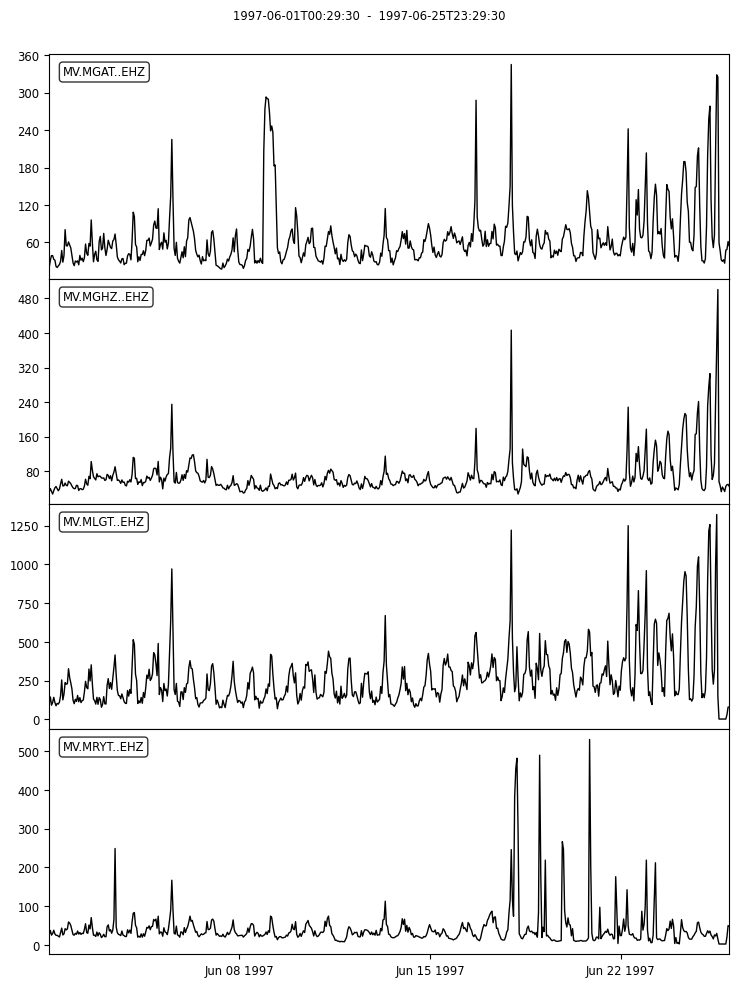

In [12]:
rsamObjSummer= rsamObjHourly.copy()
rsamObjSummer.trim(starttime=obspy.core.UTCDateTime(1997,6,1), endtime=obspy.core.UTCDateTime(1997,6,26))
rsamObjSummer.plot(kind='stream', equal_scale=False) 

These are remarkable cycles in RSAM. They appear to be about 4-6 hours apart. This is a phenomenon called "banded tremor". During these tremor bands, visual observations indicated that the lava dome was extruding at particularly high rates (up to 20m^3 was one estimate I heard), and at the peak of each cycle there was often ash venting. I proposed that the tremor bands were indicated of pressure cycles within the conduit - but caused by what? 
One suggestion is that the magma rises up the conduit in a stick-slip fashion. Basically, it gets stuck for a while, as the pressure builds below, and then shear fractures, allowing magma to suddenly extrude very quickly. 

Can we use some ObsPy STA/LTA detection tools to detect these tremor bands, in the same way we normally detect much shorter transient events, but just with longer STA/LTA settings? Let us try first on a single NSLC. This is based on examples at https://docs.obspy.org/tutorial/code_snippets/trigger_tutorial.html, except we use longer STA and LTA time windows (15 and 100 minutes respectively), and we add a despiking step which attempts to remove transient events lasting a minute or less from the data before running the STA/LTA:


### 4.3 Tremor band detection with ObsPy trigger methods

#### 4.3.1 Single channel detection

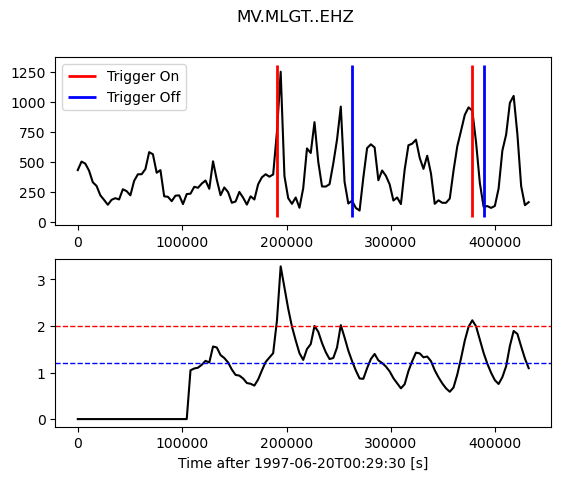

In [24]:
from obspy.signal.trigger import plot_trigger, classic_sta_lta, recursive_sta_lta

rsamZoom = rsamObjHourly.to_stream()
rsamZoom.trim(obspy.core.UTCDateTime(1997,6,20), obspy.core.UTCDateTime(1997,6,25))

sta_minutes = 5
lta_minutes = 30
threshON = 1.0*2
threshOFF = 0.3*4

cft = recursive_sta_lta(rsamZoom[2].data, sta_minutes, lta_minutes)

plot_trigger(st2[2], cft, threshON, threshOFF)

That seems to work quite well. Now let us try an event detector that uses several NSLC at once.

#### 4.3.2 Multi-channel detection

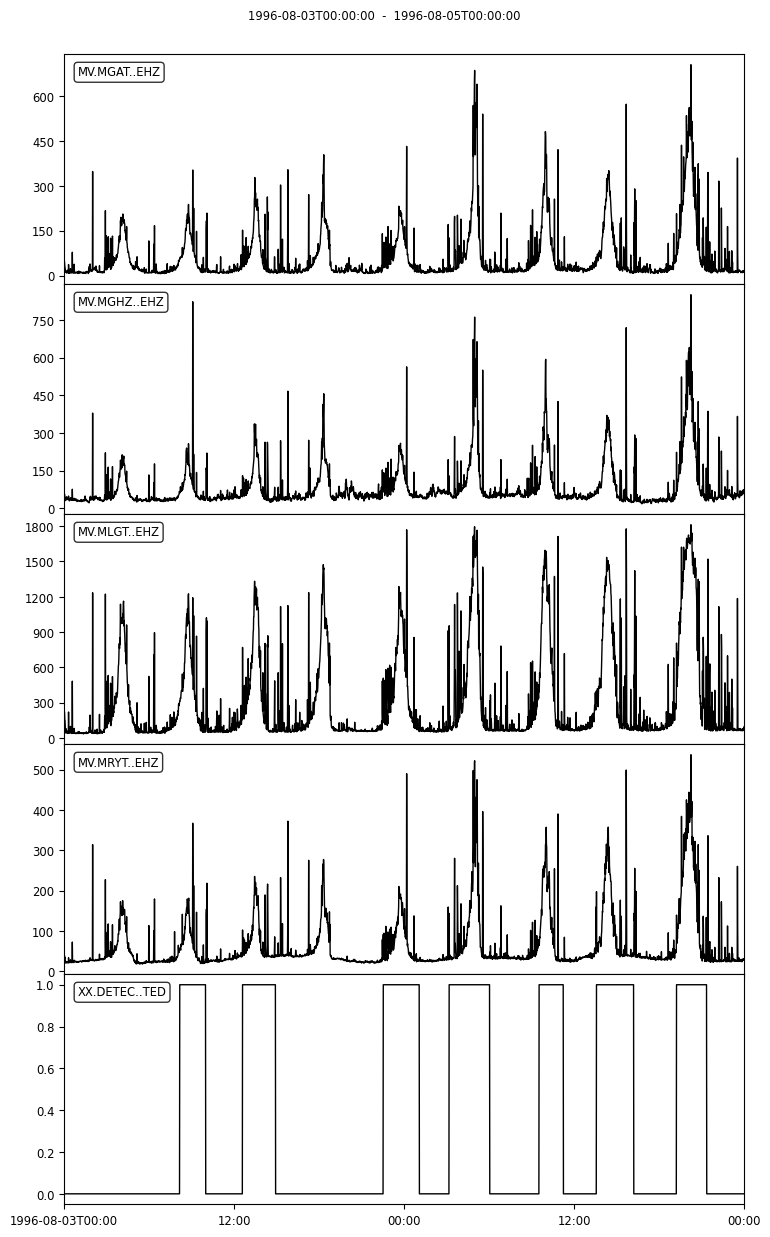

detection ON time for band 0: 1996-08-03T08:10:00.000000Z, duration: 109.0 mins
- interval (mins): 266.0
detection ON time for band 1: 1996-08-03T12:36:00.000000Z, duration: 139.0 mins
- interval (mins): 596.0
detection ON time for band 2: 1996-08-03T22:32:00.000000Z, duration: 152.0 mins
- interval (mins): 279.0
detection ON time for band 3: 1996-08-04T03:11:00.000000Z, duration: 171.0 mins
- interval (mins): 381.0
detection ON time for band 4: 1996-08-04T09:32:00.000000Z, duration: 102.0 mins
- interval (mins): 243.0
detection ON time for band 5: 1996-08-04T13:35:00.000000Z, duration: 148.0 mins
- interval (mins): 15.0
detection ON time for band 6: 1996-08-04T13:50:00.000000Z, duration: 142.0 mins
- interval (mins): 324.0
detection ON time for band 7: 1996-08-04T19:14:00.000000Z


In [16]:
from obspy.signal.trigger import coincidence_trigger
from pprint import pprint
import numpy as np

threshStations = 3

trig = coincidence_trigger("recstalta", threshON, threshOFF, st2, threshStations, sta=sta_minutes*60, lta=lta_minutes*60, max_trigger_length=2*lta_minutes*60, delete_long_trigger=True)

#pprint(trig)

lendata = len(st[0].data)
trdata = np.zeros( (lendata, ) )
detectionTrace = obspy.Trace( data = trdata ) 
detectionTrace.id = 'XX.DETEC..TED'
detectionTrace.stats.starttime = st2[0].stats.starttime
detectionTrace.stats.sampling_rate = st2[0].stats.sampling_rate
t = detectionTrace.times('utcdatetime')
for thistrig in trig:
    t0 = thistrig['time']
    t1 = (thistrig['time'] + thistrig['duration'])
    indices = np.where((t >= t0) & (t <= t1))
    #print(t0, t1, indices)
    detectionTrace.data[indices] = 1 #thistrig['duration']

st3 = st2.copy()
st3.append(detectionTrace)
st3.trim(obspy.core.UTCDateTime(1996,8,3), obspy.core.UTCDateTime(1996,8,5))
st3.plot(equal_scale=False);

detection_ON_times = [thistrig['time'].timestamp for thistrig in trig]
detection_intervals_minutes = np.diff(np.array(detection_ON_times))/60
for i,d in enumerate(detection_intervals_minutes):
    print(f"detection ON time for band {i}: {trig[i]['time']}, duration: {trig[i]['duration']/60} mins")
    print(f"- interval (mins): {detection_intervals_minutes[i]}")
print(f"detection ON time for band {i+1}: {trig[i+1]['time']}")

The bottom trace here corresponds to the detected events, and you can see they line up pretty well with the tremor bands, except the first one was missed.

This is similar to the banded tremor alarm system I wrote at MVO in 2000. And using this approach we can forecast the timing of the next tremor band. As it was the MVO Seismologist's job to manage the Operations Room, which included continuous seismic monitoring and two-way radio communications with MVO field crews, it was useful to predict tremor bands, as these were periods of heightened activity when field crews should not be on the flanks of the volcano.




In [17]:
# find peak value and peak time during each band
import pandas as pd
lod = []
tr = st3.select(id='MV.MLGT..EHZ')[0]
for thistrig in trig:
    bandstarttime = thistrig['time']
    bandendtime = thistrig['time'] + thistrig['duration']
    #bandTrace = maskedTrace.copy().trim(starttime=bandstarttime, endtime=bandendtime)    
    #bandpeaktime = bandstarttime + bandTrace.data.argmax() * tr.stats.delta
    tr2 = tr.copy().trim(starttime=bandstarttime, endtime=bandendtime)
    bandpeaktime = bandstarttime + tr2.data.argmax() * tr2.stats.delta
    band = {'starttime':bandstarttime, 'waxtime':bandpeaktime-bandstarttime, \
            'peaktime':bandpeaktime, 'wanetime':bandendtime-bandpeaktime, 'endtime':bandendtime, 'duration':thistrig['duration']}
    lod.append(band)


bandDf = pd.DataFrame(lod)
print(bandDf)

predicted = []
for col in ['starttime', 'peaktime', 'endtime']:
    interval = (bandDf.iloc[-1][col] - bandDf.iloc[0][col]) / (len(bandDf)-1) 
    predicted.append(bandDf.iloc[-1][col] + interval)
print('\nNext band prediction:')
print(' - start: ',predicted[0])
print(' - peak:  ',predicted[1])
print(' - end:   ',predicted[2])

                     starttime  waxtime                     peaktime  \
0  1996-08-03T08:10:00.000000Z   2220.0  1996-08-03T08:47:00.000000Z   
1  1996-08-03T12:36:00.000000Z   3060.0  1996-08-03T13:27:00.000000Z   
2  1996-08-03T22:32:00.000000Z   5940.0  1996-08-04T00:11:00.000000Z   
3  1996-08-04T03:11:00.000000Z   6480.0  1996-08-04T04:59:00.000000Z   
4  1996-08-04T09:32:00.000000Z   4800.0  1996-08-04T10:52:00.000000Z   
5  1996-08-04T13:35:00.000000Z   7560.0  1996-08-04T15:41:00.000000Z   
6  1996-08-04T13:50:00.000000Z   6660.0  1996-08-04T15:41:00.000000Z   
7  1996-08-04T19:14:00.000000Z   3660.0  1996-08-04T20:15:00.000000Z   

   wanetime                      endtime  duration  
0    4320.0  1996-08-03T09:59:00.000000Z    6540.0  
1    5280.0  1996-08-03T14:55:00.000000Z    8340.0  
2    3180.0  1996-08-04T01:04:00.000000Z    9120.0  
3    3780.0  1996-08-04T06:02:00.000000Z   10260.0  
4    1320.0  1996-08-04T11:14:00.000000Z    6120.0  
5    1320.0  1996-08-04T16:03:00.

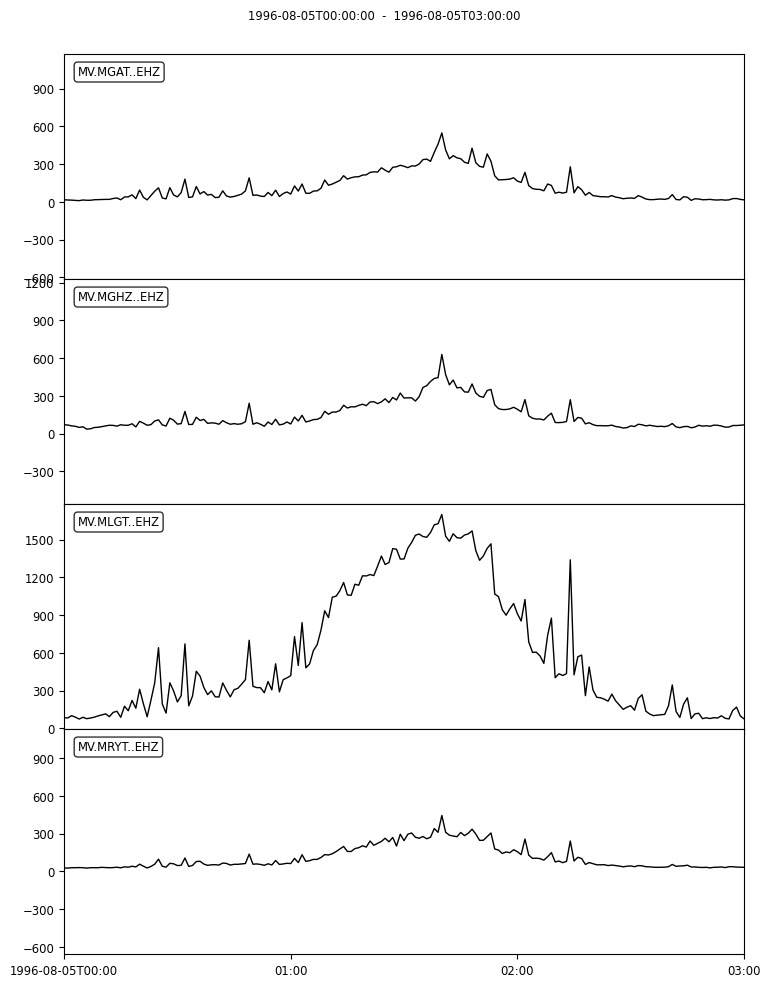

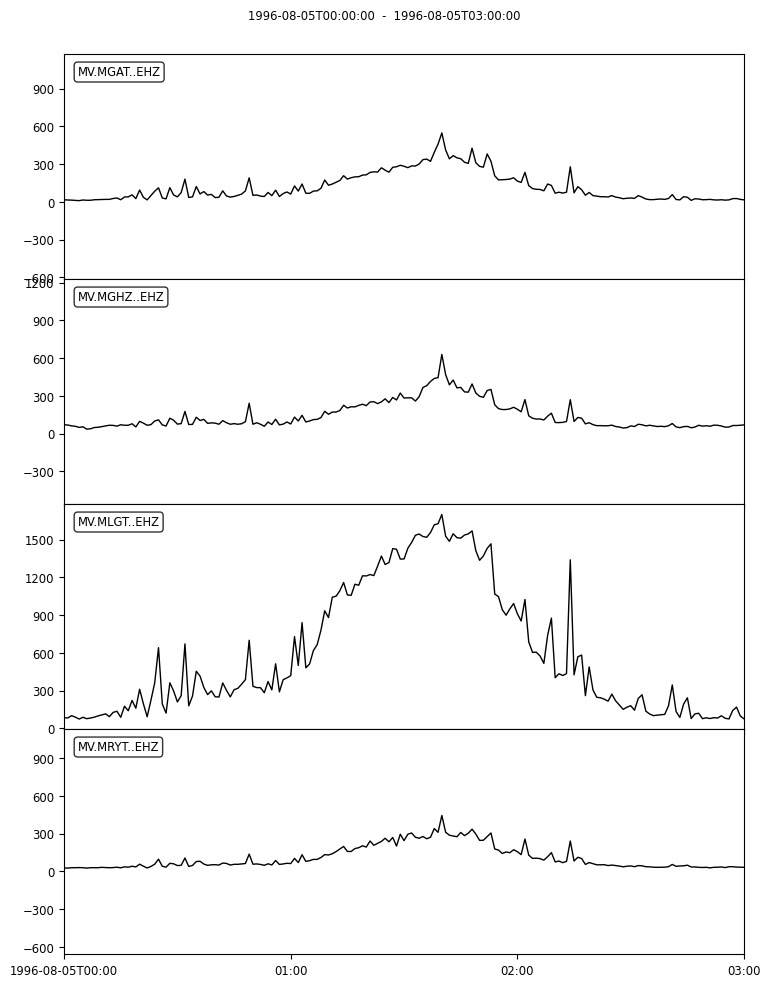

In [18]:
st5 = st.copy()
st5.trim(starttime = obspy.core.UTCDateTime(1996,8,5,0,0,0), endtime = obspy.core.UTCDateTime(1996,8,5,3,0,0) )
st5.plot()